In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\LENOVO\Desktop\SensorConnectData_slow.csv",skiprows=30)

In [3]:

type(data['Time'])
data['Time']=pd.to_datetime(data['Time'])
print(data.columns)
data.columns=['Time','gx','gy','gz','gyx','gyy','gyz','thetax','thetay','thetaz','vx','vy','vz']
print(data.columns)

Index(['Time', 'inertial-6253.106810:scaledAccelX',
       'inertial-6253.106810:scaledAccelY',
       'inertial-6253.106810:scaledAccelZ', 'inertial-6253.106810:scaledGyroX',
       'inertial-6253.106810:scaledGyroY', 'inertial-6253.106810:scaledGyroZ',
       'inertial-6253.106810:deltaThetaX', 'inertial-6253.106810:deltaThetaY',
       'inertial-6253.106810:deltaThetaZ', 'inertial-6253.106810:deltaVelX',
       'inertial-6253.106810:deltaVelY', 'inertial-6253.106810:deltaVelZ'],
      dtype='object')
Index(['Time', 'gx', 'gy', 'gz', 'gyx', 'gyy', 'gyz', 'thetax', 'thetay',
       'thetaz', 'vx', 'vy', 'vz'],
      dtype='object')


[]

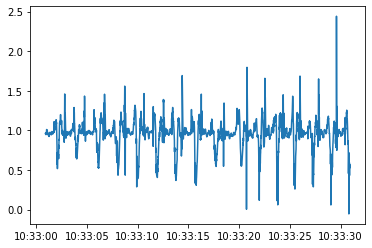

In [4]:
import matplotlib.pyplot as plt
plt.plot(data['Time'],data['gx'])
plt.plot()

[]

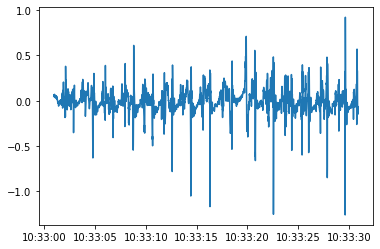

In [5]:
plt.plot(data['Time'],data['gy'])
plt.plot()

[]

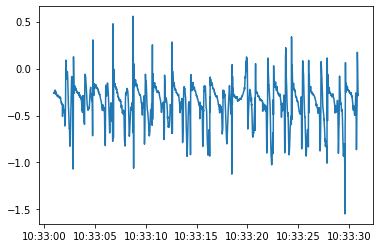

In [6]:
plt.plot(data['Time'],data['gz'])
plt.plot()

[]

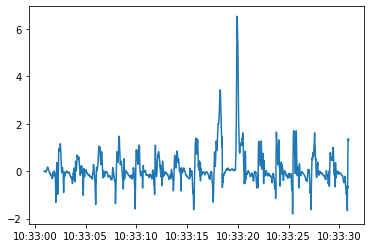

In [7]:
plt.plot(data['Time'],data['gyx'])
plt.plot()

[]

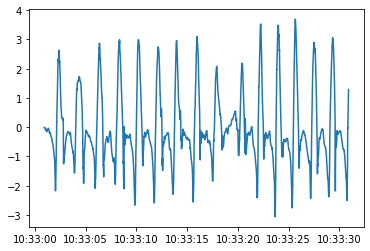

In [8]:
plt.plot(data['Time'],data['gyy'])
plt.plot()

[]

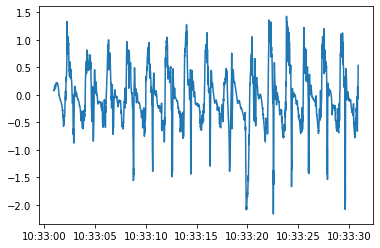

In [9]:
plt.plot(data['Time'],data['gyz'])
plt.plot()

In [10]:
import statistics
from statistics import variance
from fractions import Fraction as fr


In [11]:
m=(np.var(data['gx'])+np.var(data['gy'])+np.var(data['gz']))
print(m)
n=(np.var(data['gyx'])+np.var(data['gyy'])+np.var(data['gyz']))
print(n)

0.09441059340898869
2.306808054534644


0       0.994966
1       1.003305
2       1.002650
3       0.997286
4       0.987870
          ...   
2993    0.618093
2994    0.589413
2995    0.570105
2996    0.649752
2997    0.538897
Name: Acceleration, Length: 2998, dtype: float64


[]

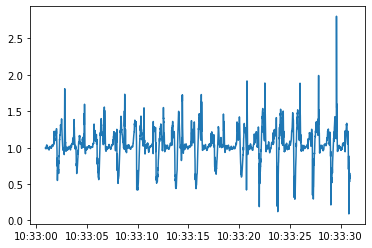

In [12]:
data['Acceleration']= pow(pow((data['gx']),2)+pow((data['gy']),2)+pow((data['gz']),2),0.5)
print(data['Acceleration'])
plt.plot(data['Time'],data['Acceleration'])
plt.plot()


0       0.084131
1       0.076671
2       0.073789
3       0.082696
4       0.092992
          ...   
2993    1.393647
2994    1.521949
2995    1.682736
2996    1.710210
2997    1.915509
Name: Gyroscope, Length: 2998, dtype: float64
0.9293261291931303


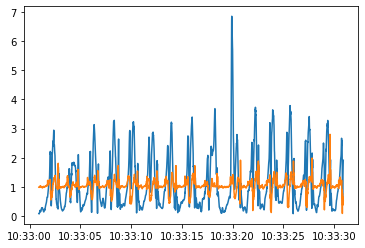

In [13]:
data['Gyroscope']= pow(pow((data['gyx']),2)+pow((data['gyy']),2)+pow((data['gyz']),2),0.5)
print(data['Gyroscope'])
plt.plot(data['Time'],data['Gyroscope'],data['Time'],data['Acceleration'])
print(np.var(data['Gyroscope']))

In [14]:
arr1= np.array([data['gyx'],data['gyy'],data['gyz']])
arr2=np.array([data['gyx']])
arr3=np.array([data['gyy']])
arr4=np.array([data['gyz']])
print(np.var(arr1))
print(arr1.shape)
print(np.cov(arr1))
mean1= np.mean(data['gyx'])
mean2= np.mean(data['gyy'])
mean3= np.mean(data['gyz'])
print(np.var(arr2))
print(np.var(arr3))
print(np.var(arr4))
covxy=(sum(np.absolute((data['gyx']-mean1)*(data['gyy']-mean2))))/300
print(covxy)
covxz=(sum((data['gyx']-mean1)*(data['gyz']-mean3)))/300
print(covxz)
covyz=(sum((data['gyy']-mean2)*(data['gyz']-mean3)))/300
print(covyz)





0.77239314455945
(3, 2998)
[[0.48940923 0.4381754  0.02625313]
 [0.4381754  1.56578706 0.46946829]
 [0.02625313 0.46946829 0.25238147]]
0.4892459888933625
1.5652647819591325
0.25229728368214954
4.993013401870451
0.26226879337398695
4.689988196951014


In [15]:
print(data.columns)
data.columns=['Time','gx','gy','gz','gyx','gyy','gyz','thetax','thetay','thetaz','vx','vy','vz','acc','gyro']
print(data.columns)

Index(['Time', 'gx', 'gy', 'gz', 'gyx', 'gyy', 'gyz', 'thetax', 'thetay',
       'thetaz', 'vx', 'vy', 'vz', 'Acceleration', 'Gyroscope'],
      dtype='object')
Index(['Time', 'gx', 'gy', 'gz', 'gyx', 'gyy', 'gyz', 'thetax', 'thetay',
       'thetaz', 'vx', 'vy', 'vz', 'acc', 'gyro'],
      dtype='object')


In [16]:
arr5=np.array([data['gx'],data['gy'],data['gz'],data['gyx'],data['gyy'],data['gyz'],data['thetax'],data['thetay'],data['thetaz'],data['vx'],data['vy'],data['vz']])
arr6=np.corrcoef(arr5)
arr6.shape
print(arr6)
data['Time']=pd.to_datetime(data['Time'])


[[ 1.         -0.09468214 -0.18477751 -0.04651683 -0.08034268 -0.25840716
  -0.05125789 -0.08771798 -0.26350254  0.98850996 -0.0839413  -0.17732621]
 [-0.09468214  1.         -0.12835112  0.01458651  0.14042837  0.05386858
   0.01541233  0.14060549  0.04852267 -0.08375789  0.98781569 -0.12487705]
 [-0.18477751 -0.12835112  1.          0.02987838 -0.16793882 -0.13821119
   0.0349552  -0.16097814 -0.13170256 -0.17087016 -0.12319843  0.99722678]
 [-0.04651683  0.01458651  0.02987838  1.          0.5005478   0.07469926
   0.99932084  0.5003172   0.07488166 -0.04943767  0.01518766  0.01159978]
 [-0.08034268  0.14042837 -0.16793882  0.5005478   1.          0.74681182
   0.49791966  0.99983579  0.73918556 -0.08628687  0.14611352 -0.19222185]
 [-0.25840716  0.05386858 -0.13821119  0.07469926  0.74681182  1.
   0.07287209  0.74748785  0.99850328 -0.25785847  0.05817277 -0.15833492]
 [-0.05125789  0.01541233  0.0349552   0.99932084  0.49791966  0.07287209
   1.          0.4976397   0.07268368 -0

In [17]:
mean4=np.mean(data['gx'])
mean5=np.mean(data['gy'])
corrxy= sum((data['gx']-mean4)*(data['gy']-mean5))/(pow(sum(pow((data['gx']-mean4),2))*sum(pow((data['gy']-mean5),2)),0.5))
print(corrxy)
data['v']=data['vx']*data['vx']+data['vy']*data['vy']+data['vz']*data['vz']

-0.09468214338419396


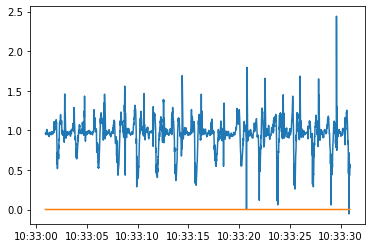

In [18]:
plt.plot(data['Time'],data['gx'],data['Time'],data['v'])

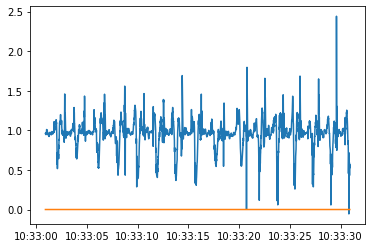

In [21]:
mean=(data['v'][0]+data['v'][1]+data['v'][2])/3
arr_vthresh= np.array(mean)
i=2;
while(i<=2996):
    mean=(data['v'][i-1]+data['v'][i]+data['v'][i+1])/3
    arr_vthresh=np.append(arr_vthresh,mean)
    i=i+1
arr_vthresh=np.append(arr_vthresh,mean)
arr_vthresh=np.append(arr_vthresh,mean)
data['vmean']=arr_vthresh
plt.plot(data['Time'], data['gx'], data['Time'],abs(data['vmean']-data['v']))

In [20]:

# #data['mark_stance']= ((data['vx'] >= 0.096) & (data['vx']<= 0.115)& (data['vz']>=-0.02) & (data['vz']<=0.02) & (data['vy']>=-0.02) & (data['vy']<=0.02) & (data['thetax']>=-0.05) & (data['thetax']<=0.05))
# plt.plot(data['Time'],data['gx'],data['Time'],data['mark_stance5'] )
# from sklearn.metrics import accuracy_score
# print(accuracy_score(data['mark_stance5'], data['mark_stance1']))
# print(accuracy_score(data['mark_stance5'], data['mark_stance2']))
# print(accuracy_score(data['mark_stance5'], data['mark_stance3']))
# print(accuracy_score(data['mark_stance5'], data['mark_stance4']))

0.00969890030100937


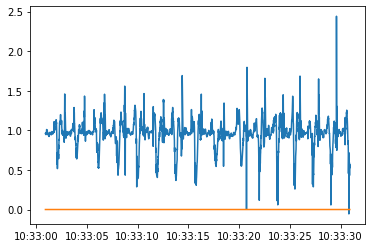

In [23]:
mean= data['vx'][0:10].sum()
mean=mean/10

mean2= data['vx'][344:354].sum()
mean2=mean2/10

mean=(mean+mean2)/2
print(mean)
i=1
arr= np.array([sum(pow((data['vx'][0:10]-mean),2))/10])
while(i<=2997):
    var1= sum(pow((data['vx'][i:(i+10)]-mean),2))/10
    i+=1
    arr=np.append(arr,var1)

np.shape(arr)
data['Var']=arr
plt.plot(data['Time'],data['gx'],data['Time'],data['Var'])
    

In [22]:
#data['acc_thresh']=((data['acc'] >= 0.97895) & (data['acc']<= 1.033))
#plt.plot(data['Time'],data['mark_stance5'],data['Time'],data['acc_thresh'])

In [24]:
from sklearn.metrics import accuracy_score
#accuracy_score(data['mark_stance'], data['acc_thresh'])

In [25]:
# arr_accthresh= np.array([data['acc'][0]])
# i=1;
# while(i<=2997):
#     mean=(data['acc'][i-1]+data['acc'][i]+data['acc'][i+1])/3
#     arr_accthresh=np.append(arr_accthresh,mean)
#     i=i+1
# arr_accthresh=np.append(arr_accthresh,data['acc'][354])
# data['accmean']=arr_accthresh
# plt.plot(data['Time'], data['accmean'], data['Time'],data['mark_stance5'])
    

In [26]:
#data['acc_thresh2']=((data['accmean'] >= 0.9876) & (data['accmean']<= 1.04))


In [27]:
#accuracy_score(data['mark_stance'], data['acc_thresh2'])

In [28]:
# plt.plot(data['Time'], data['mark_stance'], data['Time'], data['accmean'])
# plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
# # Show the minor grid as well. Style it in very light gray as a thin,
# # dotted line.
# plt.grid(which='minor', color='#CCCCCC', linestyle=':', linewidth=0.25)
# # Make the minor ticks and gridlines show.
# plt.minorticks_on()

3.054466826258739e-07


<ipython-input-31-cedf419bcab7>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance1'][k]=0
<ipython-input-31-cedf419bcab7>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance1'][k]=1


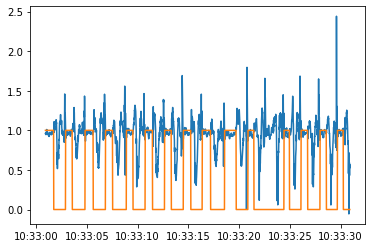

In [31]:

import math
sigma2= 3.054466826258739e-07
print(sigma2)
x=math.log10((pow(data['acc'][0]-1,2)+pow(data['acc'][1]-1,2)+pow(data['acc'][2]-1,2)+pow(data['acc'][3]-1,2)+pow(data['acc'][4]-1,2))/(5*sigma2))
arr_tm = np.array(x)
arr_tm = np.array(x)
i=2;
while(i<=2995):
    x=math.log10((pow(data['acc'][i-1]-1,2)+pow(data['acc'][i-2]-1,2)+pow(data['acc'][i+2]-1,2)+pow(data['acc'][i+1]-1,2)+pow(data['acc'][i]-1,2))/(5*sigma2))
    arr_tm=np.append(arr_tm,x)
    i+=1
arr_tm=np.append(arr_tm,x)
arr_tm=np.append(arr_tm,x)
arr_tm=np.append(arr_tm,x)
data['tm1']=arr_tm

data['mark_stance1']=(data['tm1']<4)
l=0
i=0
j=0
while(i<=2997):
    k=j
    l=0
    while(j<=2997):
        if data['mark_stance1'][j]==1 :
            l+=1
            j+=1
        else :
            if(l<50):
                while(k<=j):
                    data['mark_stance1'][k]=0
                    k+=1
            j+=1
            k=j
            l=0
    i=j      
l=0
i=0
j=0
while(i<=2997):
    k=j
    l=0
    while(j<=2997):
        if data['mark_stance1'][j]==0 :
            l+=1
            j+=1
        else :
            if(l<50):
                while(k<=j):
                    data['mark_stance1'][k]=1
                    k+=1
            j+=1
            k=j
            l=0
    i=j 
plt.plot(data['Time'],data['gx'],data['Time'],data['mark_stance1'])

    
    

<ipython-input-36-20bf1fff62e8>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance2'][k]=0
<ipython-input-36-20bf1fff62e8>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance2'][k]=1


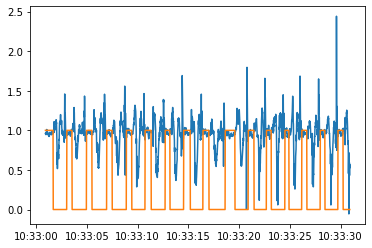

In [36]:

x=(pow(data['gyro'][0],2)+pow(data['gyro'][1],2)+pow(data['gyro'][2],2)+pow(data['gyro'][3],2)+pow(data['gyro'][4],2))/(5)
arr_tm2 = np.array(x)
arr_tm2 = np.array(x)
i=2;
while(i<=2995):
    x=(pow(data['gyro'][i-2],2)+pow(data['gyro'][i-1],2)+pow(data['gyro'][i],2)+pow(data['gyro'][i+1],2)+pow(data['gyro'][i+2],2))/(5)
    arr_tm2=np.append(arr_tm2,x)
    i+=1
arr_tm2=np.append(arr_tm2,x)
arr_tm2=np.append(arr_tm2,x)
arr_tm2=np.append(arr_tm2,x)
data['tm2']=arr_tm2

data['mark_stance2']=(data['tm2']<0.3)
l=0
i=0
j=0
while(i<=2997):
    k=j
    l=0
    while(j<=2997):
        if data['mark_stance2'][j]==1 :
            l+=1
            j+=1
        else :
            if(l<20):
                while(k<=j):
                    data['mark_stance2'][k]=0
                    k+=1
            j+=1
            k=j
            l=0
    i=j      
l=0
i=0
j=0
while(i<=2997):
    k=j
    l=0
    while(j<=2997):
        if data['mark_stance2'][j]==0 :
            l+=1
            j+=1
        else :
            if(l<20):
                while(k<=j):
                    data['mark_stance2'][k]=1
                    k+=1
            j+=1
            k=j
            l=0
    i=j 
plt.plot(data['Time'],data['gx'],data['Time'],data['mark_stance2'])


<ipython-input-38-a4aa32365b0e>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance3'][k]=0
<ipython-input-38-a4aa32365b0e>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance3'][k]=1


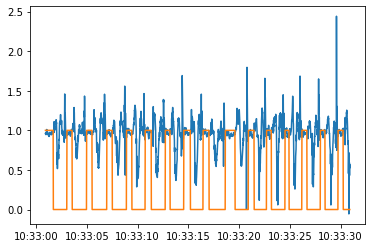

In [38]:

meax2= np.mean(data['gx'][0:4])
meay2= np.mean(data['gy'][0:4])
meaz2= np.mean(data['gz'][0:4])
x=(pow(pow(data['gx'][0]-meax2,2)+pow(data['gy'][0]-meay2,2)+pow(data['gz'][0]-meaz2,2),0.5)+pow(pow(data['gx'][1]-meax2,2)+pow(data['gy'][1]-meay2,2)+pow(data['gz'][1]-meaz2,2),0.5)+pow(pow(data['gx'][2]-meax2,2)+pow(data['gy'][2]-meay2,2)+pow(data['gz'][2]-meaz2,2),0.5)+pow(pow(data['gx'][3]-meax2,2)+pow(data['gy'][3]-meay2,2)+pow(data['gz'][3]-meaz2,2),0.5)+pow(pow(data['gx'][4]-meax2,2)+pow(data['gy'][4]-meay2,2)+pow(data['gz'][4]-meaz2,2),0.5))/(5)
arr_tm3 = np.array(x)
arr_tm3=np.append(arr_tm3,x)
i=2;
while(i<=2995):
    meax2= np.mean(data['gx'][i:i+4])
    meay2= np.mean(data['gy'][i:i+4])
    meaz2= np.mean(data['gz'][i:i+4])
    x=(pow(data['gyro'][i-2],2)+pow(data['gyro'][i-1],2)+pow(data['gyro'][i],2)+pow(data['gyro'][i+1],2)+pow(data['gyro'][i+2],2))/(5)
    arr_tm3=np.append(arr_tm3,x)
    i+=1
arr_tm3=np.append(arr_tm3,x)
arr_tm3=np.append(arr_tm3,x)

data['tm3']=arr_tm3
data['mark_stance3']=(data['tm3']<0.3)
l=0
i=0
j=0
while(i<=2997):
    k=j
    l=0
    while(j<=2997):
        if data['mark_stance3'][j]==1 :
            l+=1
            j+=1
        else :
            if(l<20):
                while(k<=j):
                    data['mark_stance3'][k]=0
                    k+=1
            j+=1
            k=j
            l=0
    i=j      
l=0
i=0
j=0
while(i<=2997):
    k=j
    l=0
    while(j<=2997):
        if data['mark_stance3'][j]==0 :
            l+=1
            j+=1
        else :
            if(l<20):
                while(k<=j):
                    data['mark_stance3'][k]=1
                    k+=1
            j+=1
            k=j
            l=0
    i=j 
plt.plot(data['Time'],data['gx'],data['Time'],data['mark_stance3'])

<ipython-input-41-47a2a7c5b124>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance4'][k]=0
<ipython-input-41-47a2a7c5b124>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance4'][k]=1


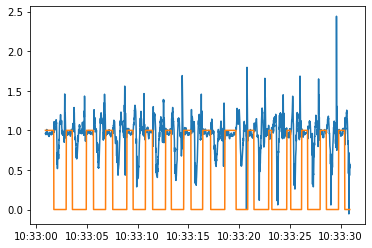

In [41]:
sigmaa=3.054466826258739e-07
sigmaw=4.374101426993713e-05
meax2= np.mean(data['gx'][0:4])
meay2= np.mean(data['gy'][0:4])
meaz2= np.mean(data['gz'][0:4])
mea2= pow((meax2*meax2)+(meay2*meay2)+(meaz2*meaz2),0.5)
x=(pow(pow(data['gx'][0]-(meax2/mea2),2)+pow(data['gy'][0]-(meay2/mea2),2)+pow(data['gz'][0]-(meaz2/mea2),2),0.5)+pow(pow(data['gx'][1]-(meax2/mea2),2)+pow(data['gy'][1]-(meay2/mea2),2)+pow(data['gz'][1]-(meaz2/mea2),2),0.5)+pow(pow(data['gx'][2]-(meax2/mea2),2)+pow(data['gy'][2]-(meay2/mea2),2)+pow(data['gz'][2]-(meaz2/mea2),2),0.5)+pow(pow(data['gx'][3]-(meax2/mea2),2)+pow(data['gy'][3]-(meay2/mea2),2)+pow(data['gz'][3]-(meaz2/mea2),2),0.5)+pow(pow(data['gx'][4]-(meax2/mea2),2)+pow(data['gy'][4]-(meay2/mea2),2)+pow(data['gz'][4]-(meaz2/mea2),2),0.5)+pow(pow(data['gx'][5]-(meax2/mea2),2)+pow(data['gy'][5]-(meay2/mea2),2)+pow(data['gz'][5]-(meaz2/mea2),2),0.5)+pow(pow(data['gx'][6]-(meax2/mea2),2)+pow(data['gz'][6]-(meaz2/mea2),2)+pow(data['gy'][6]-(meay2/mea2),2),0.5))/(7*sigmaa)
y=(pow(data['gyro'][0],2)+pow(data['gyro'][1],2)+pow(data['gyro'][2],2)+pow(data['gyro'][3],2)+pow(data['gyro'][4],2)+pow(data['gyro'][5],2)++pow(data['gyro'][6],2))/(7*sigmaw)
z=math.log10(x+y)
arr_tm4 = np.array(z)
arr_tm4=np.append(arr_tm4,z)
arr_tm4=np.append(arr_tm4,z)
i=4;
while(i<=2994):
    meax2= np.mean(data['gx'][i:i+6])
    meay2= np.mean(data['gy'][i:i+6])
    meaz2= np.mean(data['gz'][i:i+6])
    mea2= pow((meax2*meax2)+(meay2*meay2)+(meaz2*meaz2),0.5)
    x=(pow(pow(data['gx'][i-3]-meax2/mea2,2)+pow(data['gy'][i-3]-meay2/mea2,2)+pow(data['gz'][i-3]-meaz2/mea2,2),0.5)+pow(pow(data['gx'][i-2]-meax2/mea2,2)+pow(data['gy'][i-2]-meay2/mea2,2)+pow(data['gz'][i-2]-meaz2/mea2,2),0.5)+pow(pow(data['gx'][i-1]-meax2/mea2,2)+pow(data['gy'][i-1]-meay2/mea2,2)+pow(data['gz'][i-1]-meaz2/mea2,2),0.5)+pow(pow(data['gx'][i]-meax2/mea2,2)+pow(data['gy'][i]-meay2/mea2,2)+pow(data['gz'][i]-meaz2/mea2,2),0.5)+pow(pow(data['gx'][i+1]-meax2/mea2,2)+pow(data['gy'][i+1]-meay2/mea2,2)+pow(data['gz'][i+1]-meaz2/mea2,2),0.5)+pow(pow(data['gx'][i+2]-meax2/mea2,2)+pow(data['gy'][i+2]-meay2/mea2,2)+pow(data['gz'][i+2]-meaz2/mea2,2),0.5)+pow(pow(data['gx'][i+3]-meax2/mea2,2)+pow(data['gy'][i+3]-meay2/mea2,2)+pow(data['gz'][i+3]-meaz2/mea2,2),0.5))/(7*sigmaa)
    y=(pow(data['gyro'][i-2],2)+pow(data['gyro'][i-1],2)+pow(data['gyro'][i],2)+pow(data['gyro'][i+1],2)+pow(data['gyro'][i+2],2))/(7*sigmaw)
    z=math.log10(x+y)
    arr_tm4=np.append(arr_tm4,z)
    i+=1
arr_tm4=np.append(arr_tm4,z)
arr_tm4=np.append(arr_tm4,z)
arr_tm4=np.append(arr_tm4,z)
arr_tm4=np.append(arr_tm4,z)
data['tm4']=arr_tm4

data['mark_stance4']=(data['tm4']<5.4)
l=0
i=0
j=0
while(i<=2997):
    k=j
    l=0
    while(j<=2997):
        if data['mark_stance4'][j]==1 :
            l+=1
            j+=1
        else :
            if(l<20):
                while(k<=j):
                    data['mark_stance4'][k]=0
                    k+=1
            j+=1
            k=j
            l=0
    i=j      
l=0
i=0
j=0
while(i<=2997):
    k=j
    l=0
    while(j<=2997):
        if data['mark_stance4'][j]==0 :
            l+=1
            j+=1
        else :
            if(l<20):
                while(k<=j):
                    data['mark_stance4'][k]=1
                    k+=1
            j+=1
            k=j
            l=0
    i=j 
plt.plot(data['Time'],data['gx'],data['Time'],data['mark_stance4'])

<ipython-input-32-240e715d81d7>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance5'][k]=0
<ipython-input-32-240e715d81d7>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mark_stance5'][k]=1


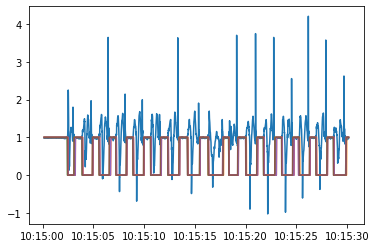

In [32]:
# %matplotlib notebook
z= np.var(data['acc'][0:5])
arr_slipvar=np.array([0,0,0,0,0,z])
i=6
while(i<=2998):
    z=np.var(data['acc'][i-5:i])
    arr_slipvar=np.append(arr_slipvar,z)
    i+=1
data['slipvar']=arr_slipvar
from scipy.signal import find_peaks
x = data['slipvar']
peaks, _ = find_peaks(x, height=0,distance=40)
# plt.plot(x)
# plt.plot(peaks, x[peaks], "x")
# plt.plot(np.zeros_like(x), "--", color="gray")
# plt.show()
#print(x[peaks])
i=2206
var1=arr_slipvar[i]
while(i<=2262):
    var1=min(arr_slipvar[i],var1)
    i+=1
i=2027
var2=arr_slipvar[i]
while(i<=2083):
    var2=min(arr_slipvar[i],var2)
    i+=1
i=1836
var3=arr_slipvar[i]
while(i<=1897):
    var3=min(arr_slipvar[i],var3)
    i+=1
i=1627
var4=arr_slipvar[i]
while(i<=1667):
    var4=min(arr_slipvar[i],var4)
    i+=1
i=1260
var5=arr_slipvar[i]
while(i<=1317):
    var5=min(arr_slipvar[i],var5)
    i+=1
i=1079
var6=arr_slipvar[i]
while(i<=1137):
    var6=min(arr_slipvar[i],var6)
    i+=1
var7=arr_slipvar[i]
acc_thresh= max(var1,var2,var3,var4,var5,var6)
data['mark_stance5']=(data['slipvar']<=(0.0005))
l=0
i=0
j=0
while(i<=2998):
    k=j
    l=0
    while(j<=2998):
        if data['mark_stance5'][j]==1 :
            l+=1
            j+=1
        else :
            if(l<20):
                while(k<=j):
                    data['mark_stance5'][k]=0
                    k+=1
            j+=1
            k=j
            l=0
    i=j      
l=0
i=0
j=0
while(i<=2998):
    k=j
    l=0
    while(j<=2998):
        if data['mark_stance5'][j]==0 :
            l+=1
            j+=1
        else :
            if(l<10):
                while(k<=j):
                    data['mark_stance5'][k]=1
                    k+=1
            j+=1
            k=j
            l=0
    i=j 
plt.plot(data['Time'],data['gx'],data['Time'],data['mark_stance5'], data['Time'],data['mark_stance4'], data['Time'],data['mark_stance3'],data['Time'],data['mark_stance2'], data['Time'],data['mark_stance1'])





In [33]:
#data['mark_stance']= ((data['vx'] >= 0.096) & (data['vx']<= 0.115)& (data['vz']>=-0.02) & (data['vz']<=0.02) & (data['vy']>=-0.02) & (data['vy']<=0.02) & (data['thetax']>=-0.05) & (data['thetax']<=0.05))
#plt.plot(data['Time'],data['gx'],data['Time'],data['mark_stance5'] )
from sklearn.metrics import accuracy_score
print(accuracy_score(data['mark_stance5'], data['mark_stance1']))
print(accuracy_score(data['mark_stance5'], data['mark_stance2']))
print(accuracy_score(data['mark_stance5'], data['mark_stance3']))
print(accuracy_score(data['mark_stance5'], data['mark_stance4']))

0.9563187729243081
0.9633211070356785
0.9579859953317773
0.9679893297765922


In [42]:
arr_mean= np.array([data['acc'][0:1]])
i=2
while(i<=2996):
    x= np.mean(data['acc'][i-2:i+2])
    arr_mean=np.append(arr_mean,x)
    i+=1
arr_mean=np.append(arr_mean,x)
arr_mean=np.append(arr_mean,x)
data['mean_acc']=arr_mean
print(data['mean_acc'])

0       0.994966
1       0.999552
2       0.997778
3       0.992848
4       0.988979
          ...   
2993    0.571734
2994    0.606841
2995    0.587042
2996    0.587042
2997    0.587042
Name: mean_acc, Length: 2998, dtype: float64


In [43]:
arr_var= np.array(np.var([data['acc'][0:4]]))
j=2
while(j<=2996):
    x= np.var(data['acc'][j-2:j+2])
    arr_var=np.append(arr_var,x)
    j+=1
arr_var=np.append(arr_var,x)
arr_var=np.append(arr_var,x)
data['var_acc']=arr_var
print(data['var_acc'])

0       0.000012
1       0.000012
2       0.000038
3       0.000057
4       0.000026
          ...   
2993    0.001590
2994    0.000905
2995    0.001636
2996    0.001636
2997    0.001636
Name: var_acc, Length: 2998, dtype: float64


In [44]:
x=np.mean(data['acc'][0:4])
y= ((sum((data['acc'][0:4]-x)**2))/4)**0.5
arr_rmse = np.array(y);
j=2
while(j<=2996):
    x=np.mean(data['acc'][j-2:j+2])
    y= ((sum((data['acc'][j-2:j+2]-x)**2))/4)**0.5
    arr_rmse=np.append(arr_rmse,y)
    j+=1
arr_rmse=np.append(arr_rmse,y)
arr_rmse=np.append(arr_rmse,y)
data['rmse_acc']=arr_rmse
print(data['rmse_acc'])


0       0.003530
1       0.003530
2       0.006178
3       0.007523
4       0.005064
          ...   
2993    0.039873
2994    0.030088
2995    0.040444
2996    0.040444
2997    0.040444
Name: rmse_acc, Length: 2998, dtype: float64


In [45]:
x= np.mean(data['acc'][0:4])
y= ((sum(abs(data['acc'][0:4]-x)))/4)
arr_mae = np.array(y);
j=2
while(j<=2996):
    x=np.mean(data['acc'][j-2:j+2])
    y= ((sum(abs(data['acc'][j-2:j+2]-x)))/4)
    arr_mae=np.append(arr_mae,y)
    j+=1
arr_mae=np.append(arr_mae,y)
arr_mae=np.append(arr_mae,y)
data['mae_acc']=arr_mae
print(data['mae_acc'])


0       0.003426
1       0.003426
2       0.005200
3       0.007120
4       0.004154
          ...   
2993    0.032019
2994    0.027082
2995    0.032541
2996    0.032541
2997    0.032541
Name: mae_acc, Length: 2998, dtype: float64


In [46]:
x= np.mean(data['gyro'][0:4])
y= ((sum(abs(data['gyro'][0:4]-x)))/4)
arr_mae = np.array(y);
j=2
while(j<=2996):
    x=np.mean(data['gyro'][j-2:j+2])
    y= ((sum(abs(data['gyro'][j-2:j+2]-x)))/4)
    arr_mae=np.append(arr_mae,y)
    j+=1
arr_mae=np.append(arr_mae,y)
arr_mae=np.append(arr_mae,y)
data['mae_gyro']=arr_mae
print(data['mae_gyro'])

0       0.004092
1       0.004092
2       0.006307
3       0.010122
4       0.012540
          ...   
2993    0.134483
2994    0.119337
2995    0.105258
2996    0.105258
2997    0.105258
Name: mae_gyro, Length: 2998, dtype: float64


In [47]:
arr_q= np.array(data['acc'])
arr_q=sorted(arr_q)
Q3_acc = np.median(arr_q[1499:])
print(Q3_acc)

1.1522872023134918


In [48]:
arr_q= np.array(data['gyro'])
arr_q=sorted(arr_q)
Q3_gyro = np.median(arr_q[1499:])
print(Q3_gyro)

1.753909646792881


In [49]:
arr5=np.array([data['gx'],data['gy'],data['gz'],data['gyx'],data['gyy'],data['gyz']])
arr6=np.corrcoef(arr5)
arr6.shape
print(arr6)

[[ 1.         -0.09468214 -0.18477751 -0.04651683 -0.08034268 -0.25840716]
 [-0.09468214  1.         -0.12835112  0.01458651  0.14042837  0.05386858]
 [-0.18477751 -0.12835112  1.          0.02987838 -0.16793882 -0.13821119]
 [-0.04651683  0.01458651  0.02987838  1.          0.5005478   0.07469926]
 [-0.08034268  0.14042837 -0.16793882  0.5005478   1.          0.74681182]
 [-0.25840716  0.05386858 -0.13821119  0.07469926  0.74681182  1.        ]]


In [50]:
import seaborn as sns
arr5=np.array([data['gx'],data['gy'],data['gz'],data['gyx'],data['gyy'],data['gyz'], data['acc'], data['gyro'], data['mean_acc'], data['var_acc'], data['rmse_acc'],data['mae_acc'], data['mae_gyro']])
arr6=np.corrcoef(arr5)
print(arr6)

[[ 1.         -0.09468214 -0.18477751 -0.04651683 -0.08034268 -0.25840716
   0.90752344  0.05905613  0.87832696  0.02027152 -0.03608212 -0.03696751
  -0.11869724]
 [-0.09468214  1.         -0.12835112  0.01458651  0.14042837  0.05386858
  -0.06373377  0.08490508 -0.06735704  0.03269468  0.07138733  0.07151118
   0.182437  ]
 [-0.18477751 -0.12835112  1.          0.02987838 -0.16793882 -0.13821119
  -0.51845464 -0.38164473 -0.52894366 -0.16759687 -0.18688669 -0.18348451
  -0.18405662]
 [-0.04651683  0.01458651  0.02987838  1.          0.5005478   0.07469926
  -0.02857099  0.52919265 -0.01202904 -0.07813836 -0.05229003 -0.05122397
   0.17438323]
 [-0.08034268  0.14042837 -0.16793882  0.5005478   1.          0.74681182
  -0.02960392  0.39836266  0.00324625 -0.09913745 -0.08399836 -0.08238325
   0.01017034]
 [-0.25840716  0.05386858 -0.13821119  0.07469926  0.74681182  1.
  -0.21682674  0.1247811  -0.1884457  -0.11086426 -0.1289986  -0.12810379
  -0.15269472]
 [ 0.90752344 -0.06373377 -0.5

In [51]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)
data.dropna(how='all', axis=1, inplace=True)
data = data.iloc[:,1:-1]
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')
data.head()

,gx,gy,gz,gyx,gyy,gyz,thetax,thetay,thetaz,vx,...,tm1,mark_stance1,tm2,mark_stance2,tm4,mark_stance4,mean_acc,var_acc,rmse_acc,mae_acc
0,1232.0,0.045375,-0.258526,-0.001551,-0.017212,0.082337,-0.000038,-0.000169,0.000818,0.009607,...,2.112295,True,0.006778,True,4.637924,True,0.994966,0.000012,0.003530,0.003426
1,1428.0,0.052600,-0.256394,-0.004775,-0.015749,0.074884,-0.000064,-0.000151,0.000752,0.009706,...,2.112295,True,0.006778,True,4.637924,True,0.999552,0.000012,0.003530,0.003426
2,1423.0,0.064077,-0.251835,-0.006381,-0.013895,0.072187,-0.000080,-0.000139,0.000719,0.009689,...,2.461395,True,0.007524,True,4.637924,True,0.997778,0.000038,0.006178,0.005200
3,1262.0,0.062306,-0.259882,-0.005254,-0.015595,0.081043,-0.000034,-0.000170,0.000831,0.009589,...,2.590960,True,0.009319,True,4.587295,True,0.992848,0.000057,0.007523,0.007120
4,1074.0,0.065902,-0.256827,-0.003484,-0.013539,0.091935,-0.000042,-0.000124,0.000909,0.009511,...,2.632676,True,0.011923,True,4.630681,True,0.988979,0.000026,0.005064,0.004154


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# X=data.drop({'mark_stance5','Time','vx','vy','vz','thetax','thetay','thetaz'},axis='columns')
# y=data['mark_stance5']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)
# print("X_train:", X_train.shape) # X_train
# print("X_test:",X_test.shape) # X_test
# print("y_train:",y_train.shape) # y_train
# print("y_test:",y_test.shape) # y_test
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# X_train_scaled=scaler.fit_transform(X_train)
# X_test_scaled=scaler.transform(X_test)
# classification=LogisticRegression(random_state=2021)
# classification.fit(X_train_scaled,y_train)
# y_predict=classification.predict(X_test_scaled)
# y_predict



<AxesSubplot:>

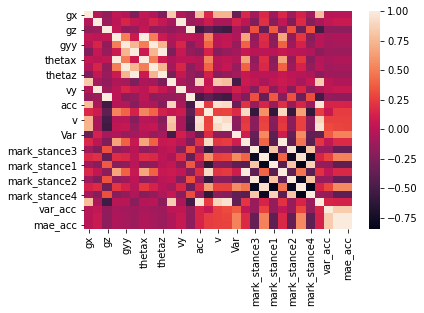

In [53]:

import seaborn as sns
corr = data.corr()
sns.heatmap(corr)

In [54]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [55]:
selected_columns = data.columns[columns]
data = data[selected_columns]
selected_columns = selected_columns[1:].values
print(selected_columns)

['gy' 'gz' 'gyx' 'gyy' 'gyz' 'vx' 'acc' 'gyro' 'Var' 'mark_stance3' 'tm1'
 'mark_stance1' 'mark_stance4' 'var_acc' 'rmse_acc']


In [56]:
import statsmodels.formula.api as sm
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)                    
    regressor_OLS.summary()
    return x, columns

In [57]:
SL = 0.01
Y=data.iloc[:,1:].values
Y=np.array(Y, dtype=float)
X_opt=data.iloc[:,0].values
X_opt = np.array(X_opt, dtype=float)
data_modeled, selected_columns = backwardElimination(Y,X_opt, SL, selected_columns)
print(selected_columns)

['gz' 'gyx' 'gyy' 'gyz' 'vx' 'acc' 'Var' 'mark_stance3' 'tm1'
 'mark_stance1' 'mark_stance4' 'var_acc' 'rmse_acc']


In [58]:

data.describe()

,gx,gy,gz,gyx,gyy,gyz,vx,acc,gyro,Var,tm1,var_acc,rmse_acc
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03,2998.000000,2.998000e+03,2998.000000
mean,1497.736157,-0.007555,-0.361351,0.097179,-0.005973,-0.041442,0.009542,1.045594,1.178422,3.743704e-06,4.285728,3.712103e-03,0.034345
std,864.889904,0.135112,0.203369,0.699578,1.251314,0.502376,0.001929,0.207562,0.964176,6.958361e-06,1.116124,1.635842e-02,0.050332
min,0.000000,-1.266183,-1.547303,-1.800895,-3.070626,-2.161127,-0.003402,0.090055,0.073789,5.435560e-10,1.279274,5.288640e-08,0.000230
25%,749.250000,-0.069423,-0.441059,-0.206757,-0.702023,-0.323457,0.009257,0.985985,0.411485,8.741951e-08,3.320407,4.928020e-05,0.007020
50%,1497.500000,-0.014132,-0.323339,-0.067821,-0.277732,-0.088215,0.009709,1.028528,0.853761,6.539879e-07,4.438407,2.654649e-04,0.016293
75%,2246.750000,0.055050,-0.238377,0.187631,0.451817,0.240424,0.010289,1.152281,1.753780,3.690572e-06,5.263184,1.704465e-03,0.041285
max,2995.000000,0.922492,0.556276,6.531662,3.692547,1.427286,0.024845,2.805050,6.854803,4.545500e-05,6.538974,4.126964e-01,0.642414


In [59]:
data.isna().sum()

gx              0
gy              0
gz              0
gyx             0
gyy             0
gyz             0
vx              0
acc             0
gyro            0
Var             0
mark_stance3    0
tm1             0
mark_stance1    0
mark_stance4    0
var_acc         0
rmse_acc        0
dtype: int64

In [60]:
X=data.drop(['mark_stance1','mark_stance4','mark_stance3','tm1'],axis='columns')
y=data['mark_stance1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)


In [61]:
print("X_train:", X_train.shape) # X_train
print("X_test:",X_test.shape) # X_test
print("y_train:",y_train.shape) # y_train
print("y_test:",y_test.shape) # y_test


X_train: (2248, 12)
X_test: (750, 12)
y_train: (2248,)
y_test: (750,)


In [62]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [63]:
classification=LogisticRegression(random_state=2021)
classification.fit(X_train_scaled,y_train)
y_predict=classification.predict(X_test_scaled)
y_predict

array([False, False, False, False, False,  True,  True, False, False,
        True, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False,  True, False, False,  True,  True,
       False,  True,  True,  True, False,  True, False, False,  True,
       False,  True,  True, False,  True, False, False,  True,  True,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False,  True,  True,  True,
       False,  True,  True, False, False,  True, False, False, False,
        True,  True, False,  True,  True, False, False, False,  True,
       False,  True,  True,  True, False,  True,  True, False, False,
        True, False, False,  True, False, False,  True, False, False,
        True,  True,

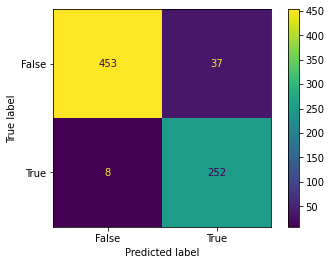

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
plot_confusion_matrix(classification, X_test_scaled, y_test)

In [65]:
accuracy_score(y_test,y_predict)

0.94

In [78]:
from sklearn import svm
clf=svm.SVC(C=50,gamma='scale')
clf.fit(X_train_scaled,y_train)
y_predict=clf.predict(X_test_scaled)
y_predict

array([False, False,  True, False,  True, False,  True, False,  True,
       False, False, False,  True,  True, False,  True,  True, False,
        True, False,  True,  True, False, False, False,  True, False,
       False,  True, False, False,  True, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False,  True, False, False,  True,  True, False,  True,  True,
        True, False, False, False, False,  True,  True, False, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True,  True,  True,
        True, False, False, False, False, False,  True, False,  True,
        True, False, False, False, False, False,  True, False, False,
        True, False,  True,  True, False,  True, False,  True, False,
       False, False,

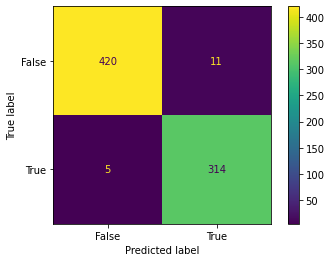

In [79]:
plot_confusion_matrix(clf, X_test_scaled, y_test)

In [80]:
accuracy_score(y_test,y_predict)

0.9786666666666667